# welcome

shapedata: https://service.pdok.nl/kadaster/bestuurlijkegrenzen/atom/bestuurlijke_grenzen.xml (gpkg)

ggd geojson:
https://cartomap.github.io/nl/wgs84/ggdregio_2025.geojson/

vaxdata
https://statline.rivm.nl/#/RIVM/nl/dataset/50141NED/table?ts=1766575956681

nuts
https://ec.europa.eu/eurostat/web/nuts/overview

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os 

In [288]:
import fiona

dir_shapefile_nl = 'data/raw/geospatial/shapefiles/bestuurlijkegrenzen.gpkg'

fiona.listlayers(dir_shapefile_nl)


shape_nuts3 = gpd.read_file(dir_shapefile_nl, layer = 'provincies')
shape_nuts4 = gpd.read_file(dir_shapefile_nl, layer = 'gemeenten')

shape_ggd  =  gpd.read_file('data/raw/geospatial/shapefiles/ggd.geojson')

CRS = shape_ggd.crs

shape_nuts3.to_crs(CRS, inplace=True)
shape_nuts4.to_crs(CRS, inplace=True)

<Axes: >

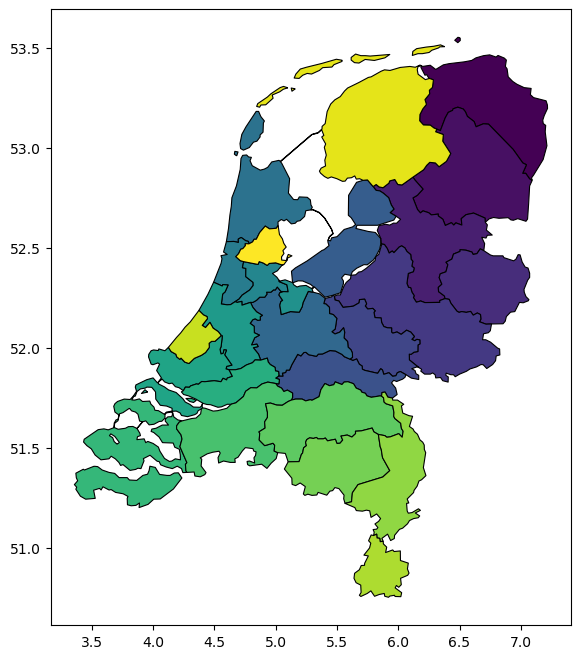

In [32]:
fig, axes = plt.subplots(1,1, figsize = (8,8))

# shape_nuts4.plot(facecolor = 'white', edgecolor= 'lightgrey', linewidth=0.7, ax = axes)
shape_ggd.plot(column = 'id', edgecolor = 'black', linewidth = 0.8, ax = axes)
# shape_nuts3.plot(facecolor = 'none', edgecolor= 'black', linewidth=1, ax = axes)

# newnew cleaning

In [ ]:
def clean_row(line: str, sep: str, expected_columns: int) -> list[str] | None:
    """
    Clean a single CSV row.
    Returns a list of cleaned columns or None if the row should be skipped.
    """

    line = line.strip()
    cols = line.split(sep)

    if len(cols) != expected_columns:
        raise ValueError(f"Unexpected number of columns: {len(cols)}")

    # basic cleanup
    cols = [c.replace('"', '').replace('*', '').replace('\ufeff', '') for c in cols]

    # last column cleanup
    value = cols[-1]

    if value == "":
        return None  # skip row

    if value.endswith(","):
        value += "0"

    cols[-1] = value.replace(",", ".")

    return cols


columnnames = ['vaccine', 'region', 'year', 'coverage']
sep = ";"
expected_columns = 4

cleaned_lines = []

with open(rawdata_dir, 'r', encoding='utf-8-sig') as infile:
    for ii, line in enumerate(infile):

        # header
        if ii == 0:
            cleaned_lines.append(sep.join(columnnames))
            continue

        try:
            cols = clean_row(line, sep, expected_columns)

        except ValueError as e:
            print(f"Line {ii}: {e}")
            continue

        if cols is None:
            continue

        cleaned_lines.append(sep.join(cols))

with open(cleaneddata_dir, 'w', encoding='utf-8', newline='') as outfile:
    for line in cleaned_lines:
        outfile.write(line + "\n")



raw_data_dir  = 'data/raw/epidemiological/vaxdata.csv'
clean_data_dir= 'data/processed/epidemiological/vaxdata.csv'

## new cleaning

In [ ]:
# vaxdata = pd.read_csv(, header =0 )

rawdata_dir = 

In [267]:
# Read, clean, and write to new file
columnnames = ['vaccine','region','year','coverage']
expected_columns = 4
sep              = ";"

with open(rawdata_dir, 'r', encoding='utf-8') as infile:

    cleaned_lines = []
    
    for ii, line in enumerate(infile):
        # Clean the line

        if len(line.split(sep)) != expected_columns:
            print('unexpected number of columns')

        cols = line.split(sep)
        cols = [c.replace('"',"") for c in cols]
        cols = [c.replace('*',"") for c in cols]
        cols = [c.replace("\ufeff","") for c in cols]
        cols[-1] = cols[-1].replace(",\n","")

        if ii >0:
            if cols[-1] == "":
                continue
            else:
                if cols[-1][-1] == ",":
                    cols[-1] = cols[-1] + "0"
                cols[-1] = cols[-1].replace(",",'.')
                # cols[-1] = float(cols[-1])
        else:
            cols = columnnames

        cleaned_line = ";".join(cols)

        cleaned_lines.append(cleaned_line)


            



        

        
        
        # outfile.write(cleaned_line + '\n')


In [269]:
cleaned_lines

['vaccine;region;year;coverage',
 'DKTP basisimmuun (2 jaar);Nederland;2006;94.3',
 'DKTP basisimmuun (2 jaar);Nederland;2007;94.0',
 'DKTP basisimmuun (2 jaar);Nederland;2008;94.5',
 'DKTP basisimmuun (2 jaar);Nederland;2009;95.2',
 'DKTP basisimmuun (2 jaar);Nederland;2010;95.0',
 'DKTP basisimmuun (2 jaar);Nederland;2011;95.4',
 'DKTP basisimmuun (2 jaar);Nederland;2012;95.4',
 'DKTP basisimmuun (2 jaar);Nederland;2013;95.5',
 'DKTP basisimmuun (2 jaar);Nederland;2014;95.4',
 'DKTP basisimmuun (2 jaar);Nederland;2015;94.8',
 'DKTP basisimmuun (2 jaar);Nederland;2016;94.2',
 'DKTP basisimmuun (2 jaar);Nederland;2017;93.5',
 'DKTP basisimmuun (2 jaar);Nederland;2018;92.6',
 'DKTP basisimmuun (2 jaar);Nederland;2019;92.4',
 'DKTP basisimmuun (2 jaar);Nederland;2020;92.6',
 'DKTP basisimmuun (2 jaar);Nederland;2021;93.1',
 'DKTP basisimmuun (2 jaar);Nederland;2022;92.2',
 'DKTP basisimmuun (2 jaar);Nederland;2023;87.3',
 'DKTP basisimmuun (2 jaar);Nederland;2024;85.4',
 'DKTP basisimmuu

In [ ]:
vaxdata = pd.read_csv('data/processed/epidemiological/vaxdata.csv', sep = ";")
vaxdata

In [275]:
vaxdata['region'].nunique()

368

In [277]:
len(shape_nuts4) + len(shape_nuts3)

364

In [ ]:
matches    = []
mismatches = []


for _, row in shape_nuts4.iterrows():
    code = row['code']
    name = row['gemeentenaam']

    if name in list(vaxdata['region'].unique()):
        match = [code, name, name]
        matches.append(match)

    else:
        mismatch = [code, name]
        mismatch.append(mismatch)

In [ ]:
manual_mappings = [
    ['1684', 'Cuijk'],
    ['0786', 'Grave'],
    ['0530', 'Hellevoetsluis'],
    ['0856', 'Uden'],
    ['1685', 'Landerd'],
    ['0416', 'Langedijk'],
    ['0344', 'Utrecht'],
    ['1702', 'Sint Anthonis'],
    ['0756', 'Boxmeer'],
    ['0614', 'Westvoorne'],
    ['0501', 'Brielle'],
    ['0398', 'Heerhugowaard'],
    ['0014', 'Groningen'],
    ['0417', 'Laren'],
    ['0815', 'Mill en Sint Hubert'],
    ['0971', 'Stein'],
    ['0603', 'Rijswijk'],
    ['0373', 'Bergen (NH)'],
    ['0518', "'s-Gravenhage"],
    ['0687', 'Middelburg'],
    ['0888', 'Beek'],
    ['0164', 'Hengelo (O)'],
    ['0370', 'Beemster'],
    ['0893', 'Bergen (L)'],
    ['0457', 'Weesp']
 ]

In [310]:
vaxdata['region'].unique()

array(['Nederland', 'Aa en Hunze', 'Aalsmeer', 'Aalten', 'Achtkarspelen',
       'Alblasserdam', 'Albrandswaard', 'Alkmaar', 'Almelo', 'Almere',
       'Alphen aan den Rijn', 'Alphen-Chaam', 'Altena', 'Ameland',
       'Amersfoort', 'Amstelveen', 'Amsterdam', 'Apeldoorn', 'Arnhem',
       'Assen', 'Asten', 'Baarle-Nassau', 'Baarn', 'Barendrecht',
       'Barneveld', 'Beek (L.)', 'Beekdaelen', 'Beesel', 'Berg en Dal',
       'Bergeijk', 'Bergen (L.)', 'Bergen (NH.)', 'Bergen op Zoom',
       'Berkelland', 'Bernheze', 'Best', 'Beuningen', 'Beverwijk',
       'De Bilt', 'Bladel', 'Blaricum', 'Bloemendaal',
       'Bodegraven-Reeuwijk', 'Boekel', 'Borger-Odoorn', 'Borne',
       'Borsele', 'Boxtel', 'Breda', 'Bronckhorst', 'Brummen', 'Brunssum',
       'Bunnik', 'Bunschoten', 'Buren', 'Capelle aan den IJssel',
       'Castricum', 'Coevorden', 'Cranendonck', 'Culemborg', 'Dalfsen',
       'Dantumadiel', 'Delft', 'Deurne', 'Deventer', 'Diemen',
       'Dijk en Waard', 'Dinkelland', 'Doesburg

In [283]:
shape_nuts4['gemeentenaam'].nunique()

352

In [ ]:
matching_cols = ['nuts4','shape_name','vax_name']
matchings = 

327